In [1]:
#Projet Portefeuille

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#Données du Stock
start= "2024-05-01"
end= dt.datetime.now()

startp1= "2025-01-10" #date invest
stock1 = yf.download("GOLD", start, end)
istock1 = 400

startp2= "2025-01-10" 
stock2 = yf.download("^FCHI", start, end)
istock2 = 600

startp3= "2025-01-15" 
stock3 = yf.download("AI.PA", start, end)
istock3 = 300

startp4= "2025-01-23" 
stock4 = yf.download("TTE.PA", start, end)
istock4 = 200

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
#Adjusting Closing Price
stock1_adj = stock1["Adj Close"]
stock2_adj = stock2["Adj Close"]
stock3_adj = stock3["Adj Close"]
stock4_adj = stock4["Adj Close"]

In [5]:
#Log Price
log_stock1_adj = np.log(stock1_adj)
log_stock2_adj = np.log(stock2_adj)
log_stock3_adj = np.log(stock3_adj)
log_stock4_adj = np.log(stock4_adj)

In [6]:
#daily log return
rstock1 = log_stock1_adj.diff().dropna()
rstock2 = log_stock2_adj.diff().dropna()
rstock3 = log_stock3_adj.diff().dropna()
rstock4 = log_stock4_adj.diff().dropna()

/var/folders/4k/8h7kzppn7yz3wvf566hj8yhw0000gn/T/ipykernel_15608/3536062046.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(log_stock1_adj.index,log_stock1_adj/log_stock1_adj[0])
/var/folders/4k/8h7kzppn7yz3wvf566hj8yhw0000gn/T/ipykernel_15608/3536062046.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(log_stock2_adj.index,log_stock2_adj/log_stock2_adj[0])
/var/folders/4k/8h7kzppn7yz3wvf566hj8yhw0000gn/T/ipykernel_15608/3536062046.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

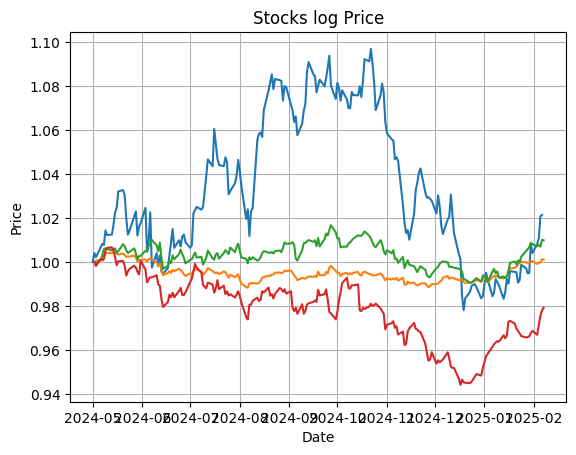

In [7]:
#Tracé log price 
#Adjust in 0
plt.title('Stocks log Price')
plt.plot(log_stock1_adj.index,log_stock1_adj/log_stock1_adj[0])
plt.plot(log_stock2_adj.index,log_stock2_adj/log_stock2_adj[0])
plt.plot(log_stock3_adj.index,log_stock3_adj/log_stock3_adj[0])
plt.plot(log_stock4_adj.index,log_stock4_adj/log_stock4_adj[0])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
#plt.show()

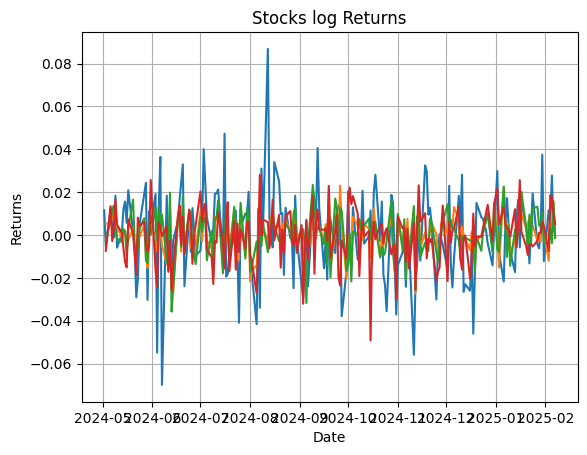

In [8]:
#Tracé log returns
plt.title('Stocks log Returns')
plt.plot(rstock1.index,rstock1)
plt.plot(rstock2.index,rstock2)
plt.plot(rstock3.index,rstock3)
plt.plot(rstock4.index,rstock4)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
#plt.show()

In [9]:
#Cumulative log returns
crstock1 = (1+rstock1.loc[startp1:]).cumprod().dropna()/(1+rstock1.loc[startp1])
crstock2 = (1+rstock2.loc[startp2:]).cumprod().dropna()/(1+rstock2.loc[startp2])
crstock3 = (1+rstock3.loc[startp3:]).cumprod().dropna()/(1+rstock3.loc[startp3])
crstock4 = (1+rstock4.loc[startp4:]).cumprod().dropna()/(1+rstock4.loc[startp4])

common_index = crstock1.index.union(crstock2.index).union(crstock3.index).union(crstock4.index)

# Reindexer les séries pour les aligner avec le même index tout en laissant les NaN là où il manque des données
crstock1_full = crstock1.reindex(common_index)
crstock2_full = crstock2.reindex(common_index)
crstock3_full = crstock3.reindex(common_index)
crstock4_full = crstock4.reindex(common_index)

# Remplir les NaN par 1 dans les séries de rendements cumulés avant leur début (car aucune performance avant le début)
crstock1_full = crstock1_full.fillna(1)
crstock2_full = crstock2_full.fillna(1)
crstock3_full = crstock3_full.fillna(1)
crstock4_full = crstock4_full.fillna(1)

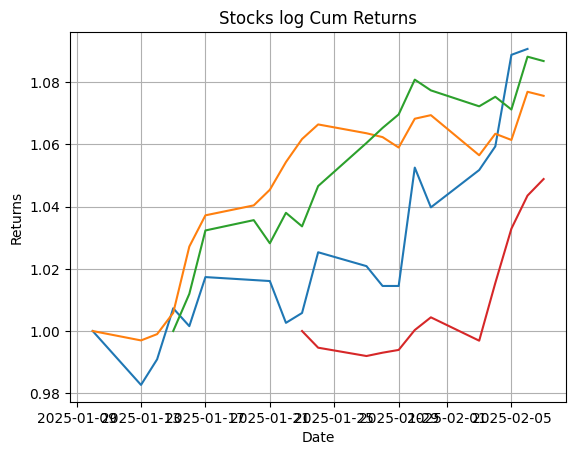

In [10]:
plt.title('Stocks log Cum Returns')
plt.plot(crstock1.index,crstock1)
plt.plot(crstock2.index,crstock2)
plt.plot(crstock3.index,crstock3)
plt.plot(crstock4.index,crstock4)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.show()

In [11]:
#Portfolio
istock1 = 400
istock2 = 600
istock3 = 300
istock4 = 200
nominale = istock1 + istock2 + istock3 +istock4


In [12]:
#log retrun portfolio
total_stock1 = istock1*crstock1_full
total_stock2 = istock2*crstock2_full
total_stock3 = istock3*crstock3_full
total_stock4 = istock4*crstock4_full

total_p = (total_stock1 + total_stock2 + total_stock3 + total_stock4).dropna()
r_p= ((total_stock1 + total_stock2 + total_stock3 + total_stock4)/nominale).dropna()

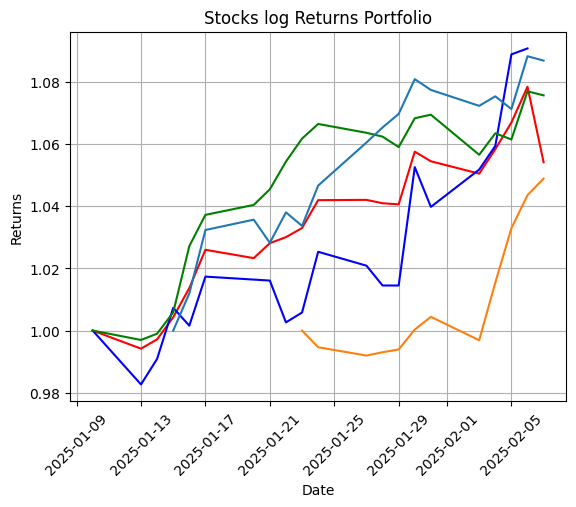

In [13]:
#Tracé log returns portfolio
plt.title('Stocks log Returns Portfolio')
plt.plot(r_p.index,r_p, color = "r")
plt.plot(crstock1.index,crstock1, color = "b")
plt.plot(crstock2.index,crstock2, color = "g")
plt.plot(crstock3.index,crstock3)
plt.plot(crstock4.index,crstock4)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

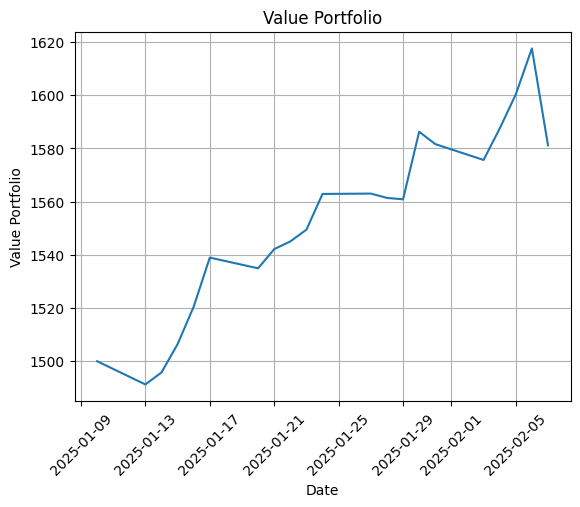

1581.174518523512

In [14]:
#Tracé Value portfolio
plt.title('Value Portfolio')
plt.plot(total_p.index,total_p)
plt.xlabel('Date')
plt.ylabel('Value Portfolio')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
Totale=total_p.iloc[-1]
Totale